# Heart Failure Prediction Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import the dataset
df = pd.read_csv("heart.csv")


In [4]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data preparation and Exploratory Data Analysis 

In [5]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


The Cholesterol Variable Have a lot of values that are 0's, which can't be true. 

[Text(0.5, 0, 'Cholesterol'), Text(0, 0.5, 'Count')]

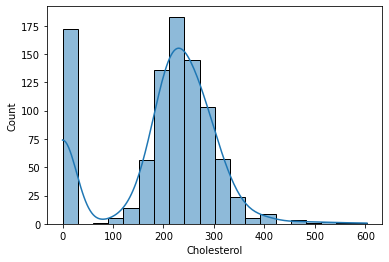

In [6]:
sns.histplot(df['Cholesterol'],kde=True,bins=20).set(xlabel='Cholesterol', ylabel='Count')

We can handle the situation by substituting the "missing" wrong data, the 0's, with the mean Cholesterol value of our dataset.
But since the missing data are a good amount, and the distribution of the Cholesterol in a population is normally distributed, if we "insert" only the mean value as the missing data we are going to generate a dataset that is more "anormal" than how it is supposed to be.

So we can also try and eliminate the Cholesterol == 0, and analyze the resulting dataframe df2

In [7]:
#Creating new datasets
#Without the Cholesterol == 0
df2 = df[df['Cholesterol']!=0]

#Dataset without the Resting BP == 0
df2 = df2[df2['RestingBP']!=0]

In [8]:
df2.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,746.000000,746,746,746.000000,746.000000,746.000000,746,746.000000,746,746.000000,746,746.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,564,370,NaN,NaN,NaN,445,NaN,459,NaN,354,NaN
mean,52.882038,NaN,NaN,133.022788,244.635389,0.167560,NaN,140.226542,NaN,0.901609,NaN,0.477212
std,9.505888,NaN,NaN,17.282750,59.153524,0.373726,NaN,24.524107,NaN,1.072861,NaN,0.499816
min,28.000000,NaN,NaN,92.000000,85.000000,0.000000,NaN,69.000000,NaN,-0.100000,NaN,0.000000
25%,46.000000,NaN,NaN,120.000000,207.250000,0.000000,NaN,122.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,237.000000,0.000000,NaN,140.000000,NaN,0.500000,NaN,0.000000
75%,59.000000,NaN,NaN,140.000000,275.000000,0.000000,NaN,160.000000,NaN,1.500000,NaN,1.000000


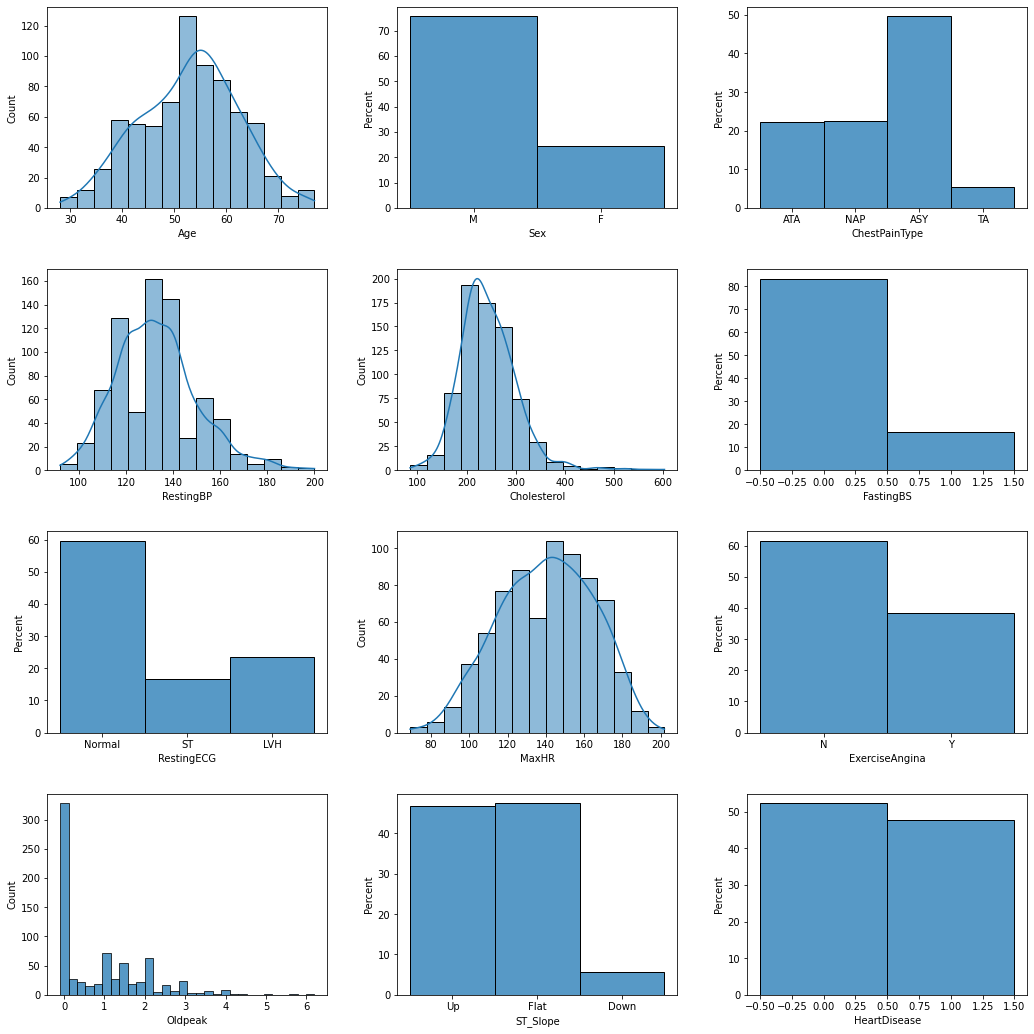

In [9]:
#Plotting all the Features 
fig, axs = plt.subplots(4,3, figsize=(15,15))

#1 row graph
#Age
sns.histplot(df2['Age'],kde=True,bins=15, ax=axs[0,0]).set(xlabel='Age', ylabel='Count')
#Sex
sns.histplot(x='Sex',stat='percent',discrete = True, data=df2, ax=axs[0,1])
#ChestpainType
sns.histplot(x='ChestPainType',stat='percent', data=df2, ax=axs[0,2])

#2 row graph
#RestingBP
sns.histplot(df2['RestingBP'],kde=True,bins=15, ax=axs[1,0]).set(xlabel='RestingBP', ylabel='Count')
#Cholesterol
sns.histplot(df2['Cholesterol'],kde=True,bins=15, ax=axs[1,1]).set(xlabel='Cholesterol', ylabel='Count')
#FastingBS
sns.histplot(x='FastingBS',stat='percent',discrete=True, data=df2, ax=axs[1,2])

#3 row graph
#RestingECG
sns.histplot(x='RestingECG',stat='percent',discrete=True, data=df2, ax=axs[2,0])
#MaxHR
sns.histplot(df2['MaxHR'],kde=True,bins=15, ax=axs[2,1]).set(xlabel='MaxHR', ylabel='Count')
#ExerciseAngina
sns.histplot(x='ExerciseAngina',stat='percent',discrete=True, data=df2, ax=axs[2,2])

#4 row graph
#Oldpeak
sns.histplot(df2['Oldpeak'],bins=30, ax=axs[3,0]).set(xlabel='Oldpeak', ylabel='Count')
#ST_Slope
sns.histplot(x='ST_Slope',stat='percent',discrete=True, data=df2, ax=axs[3,1])
#HeartDisease
sns.histplot(x='HeartDisease',stat='percent',discrete=True, data=df2, ax=axs[3,2])


fig.tight_layout(pad=3.0) 
plt.savefig('EDA_graphs.png', facecolor = 'w')
plt.show()

We can observe that a lot of other numerical variables are normally distributed, like Age, RestingBP, Cholesterol,MaxHR.

In [10]:
#Change Binary Features in 0's and 1's.
#Sex
df2['Sex'] = pd.factorize(df2['Sex'])[0]
#ExerciseAngina
df2['ExerciseAngina'] = pd.factorize(df2['ExerciseAngina'])[0]
df2


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,0,0.0,Flat,1


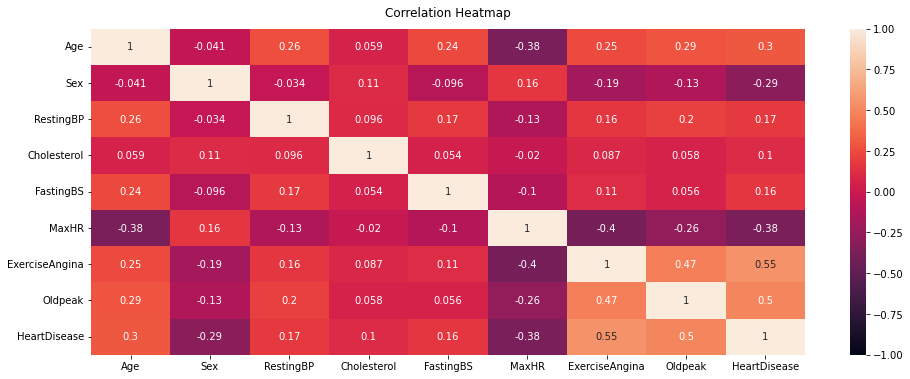

In [11]:
## Picture of Correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The variables are not very correlated.
The more correlated are:
- Age and MaxHR (negative correlation of -0.4)
- Exercise Angina and MAxHR
- Exercise Angina and MAxHR AND Heart Disease

## Brief analysis about the Categorical variables

#### ChestPainType, RestingECG, ST_Slope


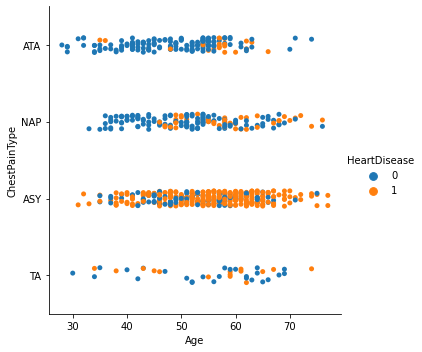

In [12]:
#Graph about ChestPainType, Age And Heart Disease
sns.catplot( x ='Age', y ='ChestPainType' , hue = 'HeartDisease', data=df2)

TA: Typical Angina
ATA: Atypical Angina
NAP: Non-Anginal Pain
ASY: Asymptomatic

Seems that the Asy cathegory have the most influencial effect on the Heart Desease

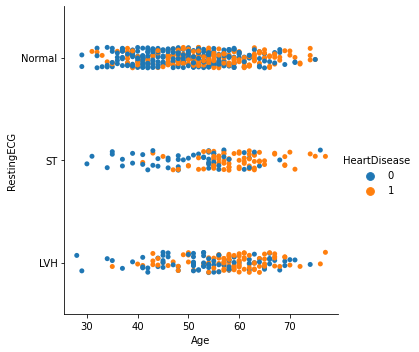

In [190]:
#Graph about RestingECG, Age And Heart Desease
sns.catplot( x ='Age', y ='RestingECG' , hue = 'HeartDisease', data=df2)

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 

Seems that all three variables are affected bt Heart Desease


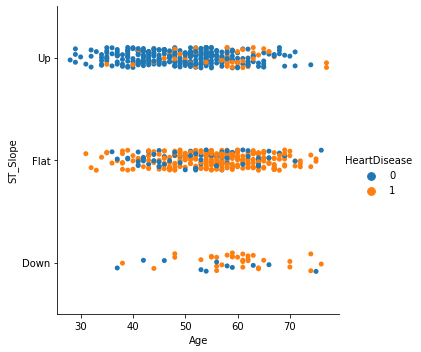

In [216]:
#Graph about RestingECG, Age And Heart Desease
sns.catplot( x ='Age', y ='ST_Slope' , hue = 'HeartDisease', data=df2)

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

The "UP" cathegory influence less the Heart Desease, while Flat and Down have a lot more Heart Desease cases in their cathegory.

## Transform the categorical data in multiple binary features

In [13]:
df3 = pd.get_dummies(df2)
df3.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,0,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,1,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,0,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,0,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,1,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [15]:
df3

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,0,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,1,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


#### Dividing the dataset in the X matrix of features and y of HeartDisease

In [173]:
#Creating the X matrix of the features
dfX = df3.drop('HeartDisease', axis=1)
X=dfX.values

#creating the array fo the y 
y = df3['HeartDisease']
y.values


X.shape, y.shape

((746, 18), (746,))

## Cross validation of a logistic regression

In [192]:
from scipy.stats import sem
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, K,repeats):
    # the type of cross validation we want to do
    cv = RepeatedKFold(n_splits=K, n_repeats=repeats, random_state=0)
    # create model
    model = LogisticRegression()
    
    # do the cross validation and save the accuracy scores here 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [198]:
# testing
#splittin ther dataset in K parts
K = 5
#r: how much times i want to repeat the whole process?
r= 1
scores = evaluate_model(X,y,K,r)
#print(scores)
print('>%d the Accuracy values have mean=%.4f and st. dev =%.3f' % (r, mean(scores), sem(scores)))
    

>1 the Accuracy values have mean=0.8565 and st. dev =0.013


## Do the cross validation multiple times: 

#### comparing the results of the mean accuracy with multiple dataset extraction

>1 mean=0.8565 se=0.013
>2 mean=0.8573 se=0.009
>3 mean=0.8593 se=0.007
>4 mean=0.8593 se=0.006
>5 mean=0.8601 se=0.005
>6 mean=0.8590 se=0.005
>7 mean=0.8589 se=0.004
>8 mean=0.8591 se=0.004
>9 mean=0.8591 se=0.004
>10 mean=0.8595 se=0.004
>11 mean=0.8601 se=0.003
>12 mean=0.8600 se=0.004
>13 mean=0.8602 se=0.003
>14 mean=0.8601 se=0.003
>15 mean=0.8603 se=0.003


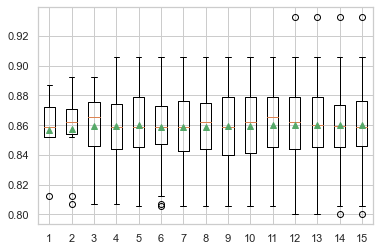

In [194]:
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
#     print(r)
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, 5, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    #print(results)
    results.append(scores)
# plot the results
# print(results)
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

## **Gaussian Discriminant Analysis**

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
# evaluate model
scores = cross_val_score(model, X_2, y_2, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.862 (0.039)


### code i found online about the "tuning of the parameters" but i have to understand it yet

In [165]:
# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
print(X_2.shape, y_2.shape)
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_2, y_2)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

(746, 18) (746,)
Mean Accuracy: 0.860
Config: {'solver': 'svd'}


C:\Users\ludov\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8604985 0.8604985       nan]
  warnings.warn(


In [168]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_2, y_2)
print(results)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(solver='lsqr'), n_jobs=-1,
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='accuracy')
Mean Accuracy: 0.860
Config: {'shrinkage': 0.0}


## Naive Bayes 

In [169]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

model = GaussianNB()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
# evaluate model
scores = cross_val_score(model, X_2, y_2, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.848 (0.041)
